# Michael Navarro: Competency 2 - Project 2

In [1]:
#----------------------------------------------------------------------------------------
#                                       Imports 
#----------------------------------------------------------------------------------------
import os
import pandas as pd
import numpy as np
from scipy import stats
from pandas.plotting import scatter_matrix
from pandas.plotting import lag_plot

#----------------------------------------------------------------------------------------
#                                   Global Constants
#----------------------------------------------------------------------------------------
HOME_DIR = os.getcwd()
APP_DATA_FNAME = "Application_Data.csv"

In [2]:
# Load application file data
app_data = pd.read_csv(APP_DATA_FNAME)

## Requirement #01: Look At Records
In the following code result block we can see the first 10 results. Looking at the attributes we can see that they are either numerical or categorical. Luckily this is a very clean dataset in that none of the attributes are made up of a list of values.

In [3]:
app_data.head(10)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,...,0,1,1,Sales staff ...,1,53,9,0,39,1
5,5008815,M,1,1,0,270000,Working ...,Higher education ...,Married ...,House / apartment ...,...,1,1,1,Accountants ...,2,47,3,0,6,1
6,5008819,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,8,1
7,5008820,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,9,1
8,5008821,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,9,1
9,5008822,M,1,1,0,135000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,0,0,Laborers ...,2,49,4,0,9,1


## Requirement #02: Display Statistical Information

In [4]:
print(f'Number of Rows: {len(app_data)}')
print(f'Number of Cols: {len(app_data.columns)}')

Number of Rows: 25128
Number of Cols: 21


In [5]:
app_data.describe()

,Applicant_ID,Owned_Car,Owned_Realty,Total_Children,Total_Income,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.418378,0.654927,0.509472,1.948365e+05,1.0,0.273758,0.292741,0.100684,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.493303,0.475402,0.762937,1.045211e+05,0.0,0.445895,0.455030,0.300916,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,1.000000,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,5.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


## Requirement #03: Data Exploration

First lets see if there are any null values in the dataframe by using the info() method. As we can see in the following code result output, there does not appear to be any attributes with a null value.

In [22]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

Just to be sure, let us make sure that there are no attributes with a null value.

In [7]:
# Count the number of attributes that are null
num_nulls = app_data.isna().sum().sum()

print(f'Nuber of NULL values: {num_nulls}')

Nuber of NULL values: 0


Now that we have ensured that there are no NULL values, let us enumerate the categorical attributes so that we can have some more numerical attributes to use as features.

In [8]:
# Factorize/Enumerate text cols for arithmetic
app_data['Gender_Code']     = app_data.Applicant_Gender.factorize()[0]
app_data['Income_Code']     = app_data.Income_Type.factorize()[0]
app_data['Education_Code']  = app_data.Education_Type.factorize()[0]
app_data['Family_Code']     = app_data.Family_Status.factorize()[0]
app_data['Housing_Code']    = app_data.Housing_Type.factorize()[0]
app_data['Job_Code']        = app_data.Job_Title.factorize()[0]

Now that we have added some new numerical attributes representing categorical attributes, let's see look at their statistical information.

In [9]:
# Save enumerated attributes into a list
enumed_attributes = ['Gender_Code', 'Income_Code', 'Education_Code', 'Family_Code', 'Housing_Code', 'Job_Code']

# Create a new datafrom with just the enumerated attributes
enumed_df = app_data[enumed_attributes]

# Show statistical info
enumed_df.describe()

,Gender_Code,Income_Code,Education_Code,Family_Code,Housing_Code,Job_Code
count,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,0.621896,0.477873,0.387416,0.573941,0.316619,4.653812
std,0.484923,0.672377,0.606393,1.020244,0.923831,3.206430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,6.000000
max,1.000000,4.000000,4.000000,4.000000,5.000000,17.000000


Before we proceed any further with the data exploration portion, let us decide what the features, and label will be.

This dataset is composed of application data for credit cards. Considering the end goal of such an application is to get a credit card, the label in this case will be the Status. The status coloumn is a binary numerical value. The number "1" indicates the application was succesfull, while the number "0" indicates a failure.

The features in this case should be related to the label, that is, the result of the application. Unfortunately, I do not know which attributes are actually taken into consideration when applying for a credit card. However, from personal experience working in retail and seeing the questions asked, I can take a guess.

In order to not miss any kind of relationships between the features and the label, I will save one list with all attributes except "Status" and another with cherry picked attributes from personal experience.

In [10]:
# Save numerical columns into a python list
all_features = list(app_data.select_dtypes([np.number]).columns)
# Remove Applicant ID, this is an abstract attribute used as a unique row ID identifier in databases if no Primary Key is created.
all_features.remove('Applicant_ID')
# Remove our label
all_features.remove('Status')
# Remove Owned Mobile Phone because all values in this column are 1
all_features.remove('Owned_Mobile_Phone')

# Save selected numerical columns as features
sel_features = ['Owned_Car', 'Owned_Realty', 'Total_Income', 'Total_Family_Members',
                'Applicant_Age', 'Total_Bad_Debt', 'Total_Good_Debt', 'Gender_Code', 
                'Family_Code', 'Housing_Code', 'Job_Code']

# Uncomment to see the result of the variables
# print('===================== ALL ATTRIBUTES =====================')
# print(all_features)
# print()
# print('===================== SEL ATTRIBUTES =====================')
# print(sel_features)

Now that we have our features sorted out, let us remove any rows with outliers to normalize our data.

In [11]:
# Make a copy of sel features because we are going to need to remove Total_Income before plotting
tmp_feats = all_features.copy()

# Normalize the data by removing anything above 2 std deviations using the z-score of each respective column
# I chose 2 std deviations becuase this is what I was taught in my statistics class is normal.
# We can switch to three if we want.
# 2 std deviations = 95% of data
# 3 std deviations = 99.7% of data
std_dev = 2
normalized_data_all = app_data[(np.abs(stats.zscore(app_data[tmp_feats])) < std_dev).all(axis=1)]

# Remove Total_Income because it ruins the graph scaling.
tmp_feats.remove('Total_Income')

<AxesSubplot:>

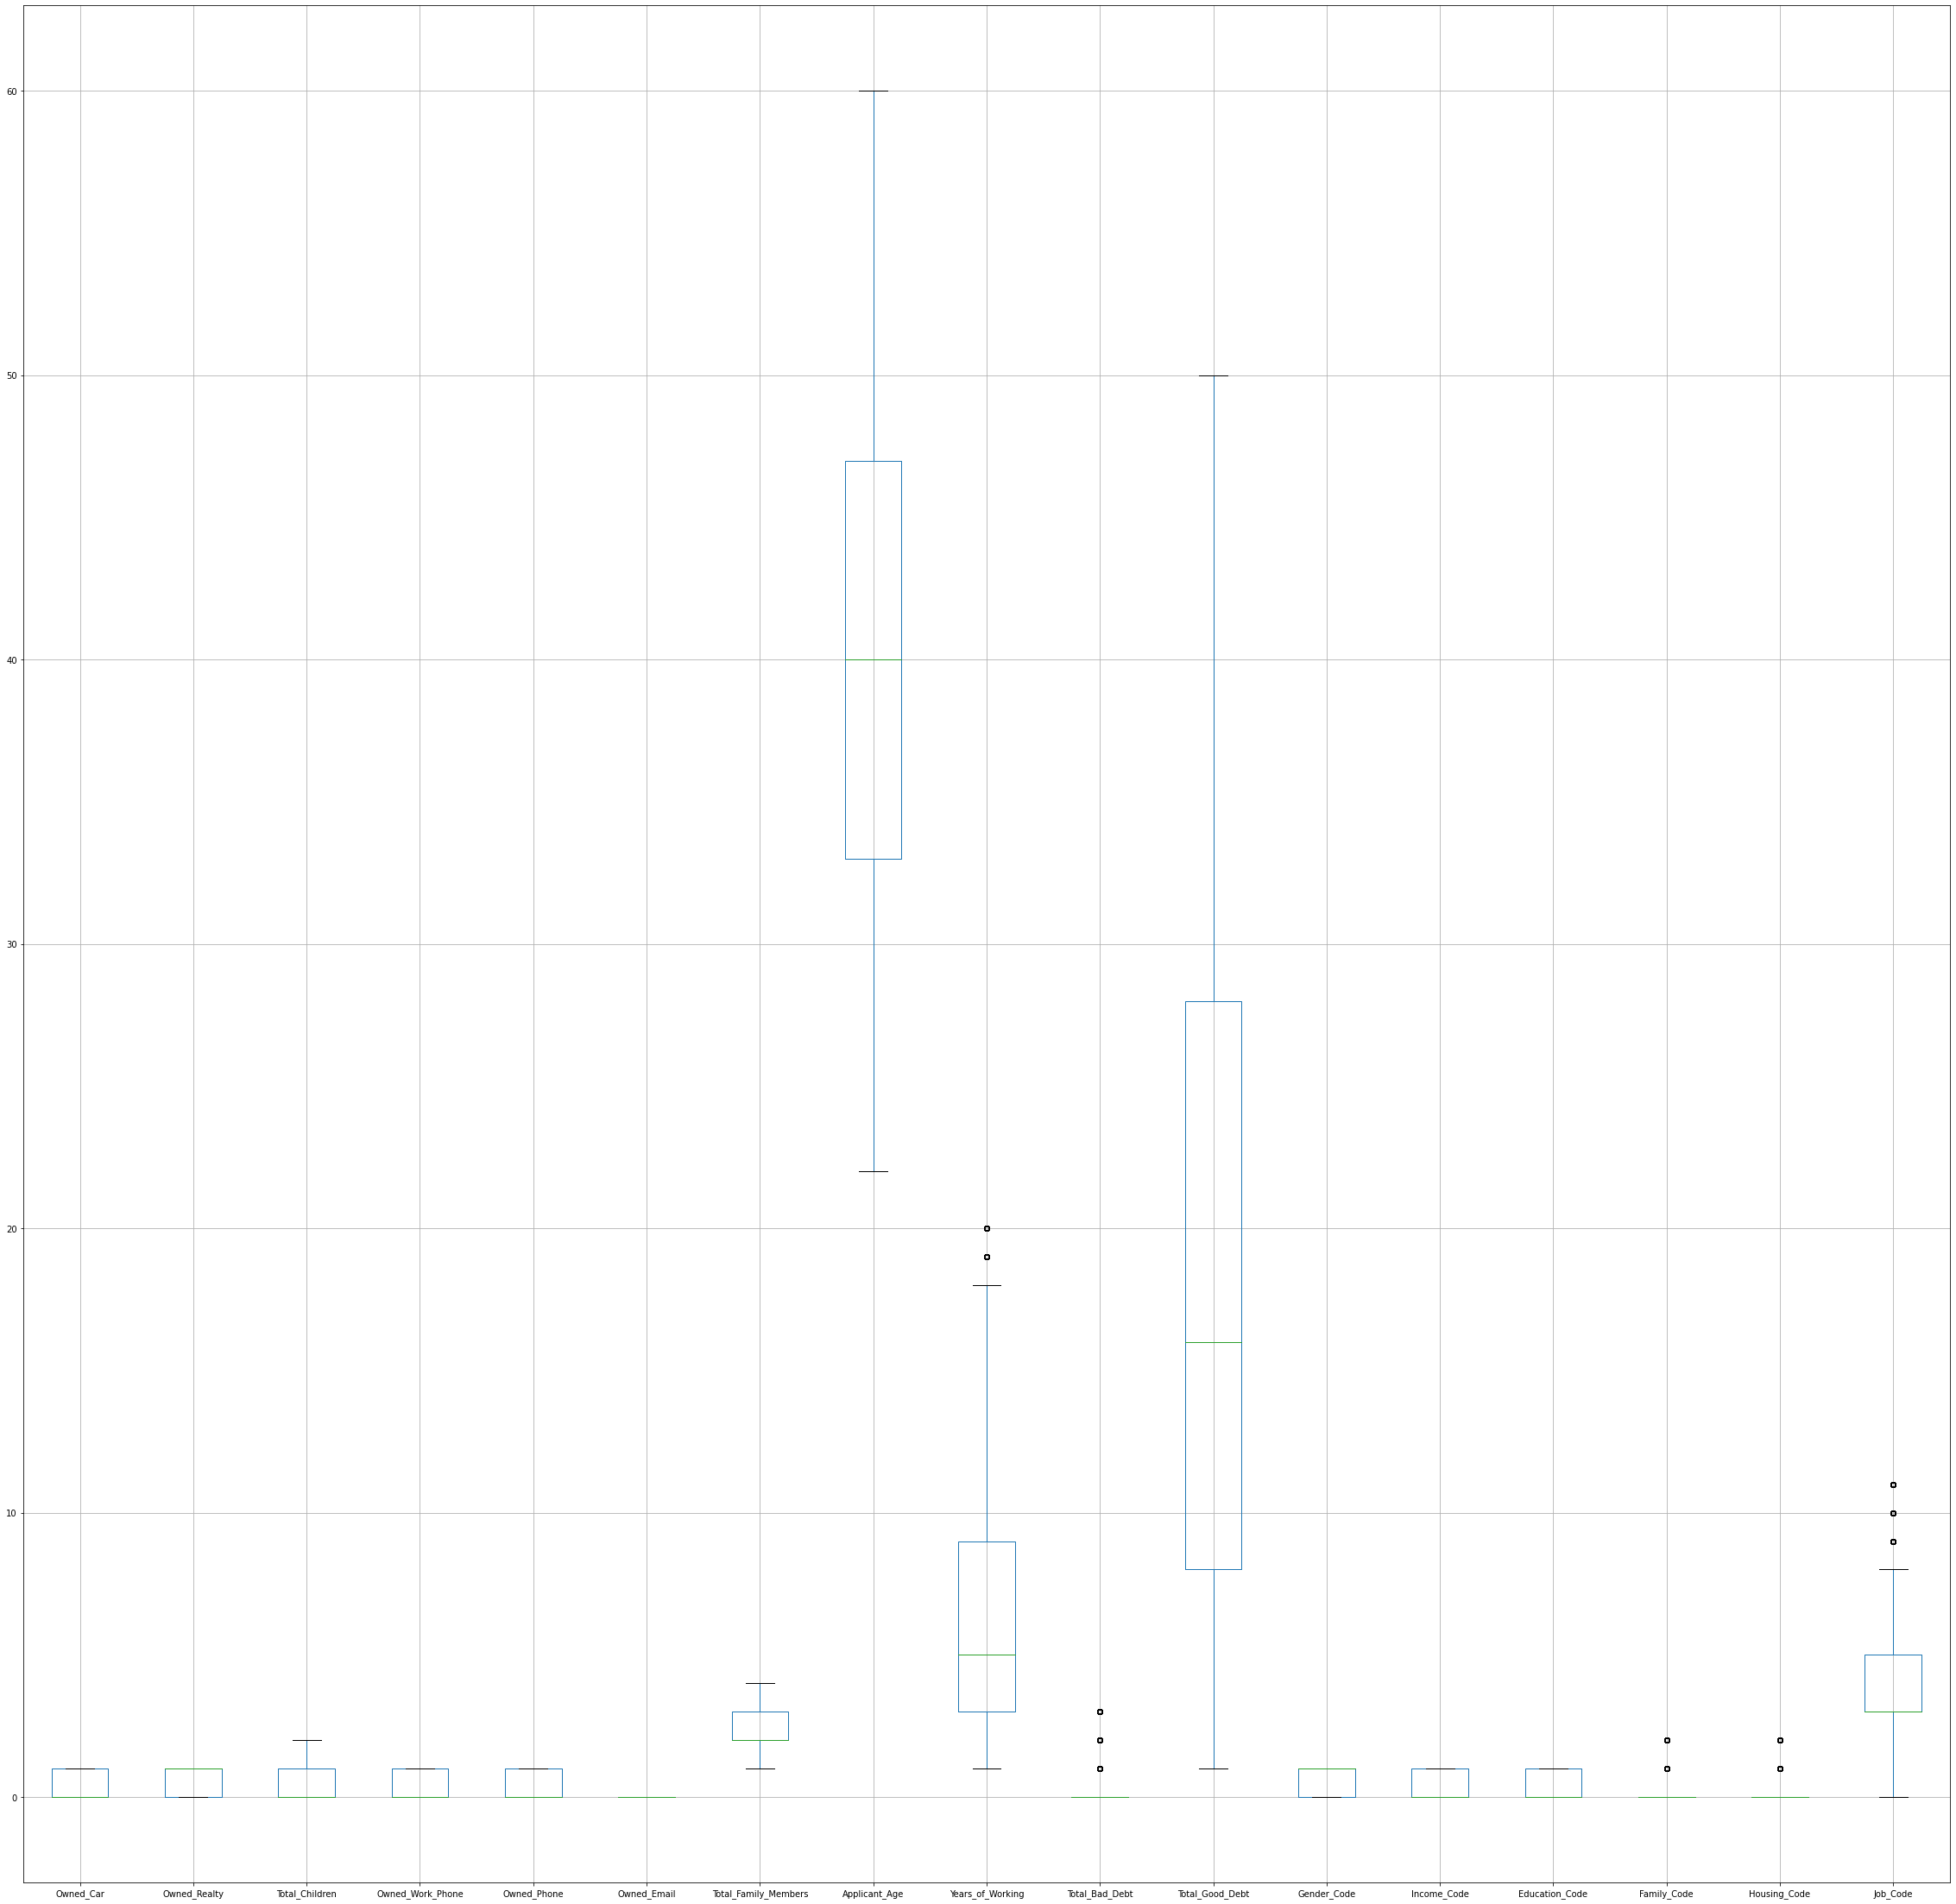

In [12]:
# Plot all selected features except Total_Income
normalized_data_all.boxplot(column = tmp_feats, figsize=(40, 40))

<AxesSubplot:>

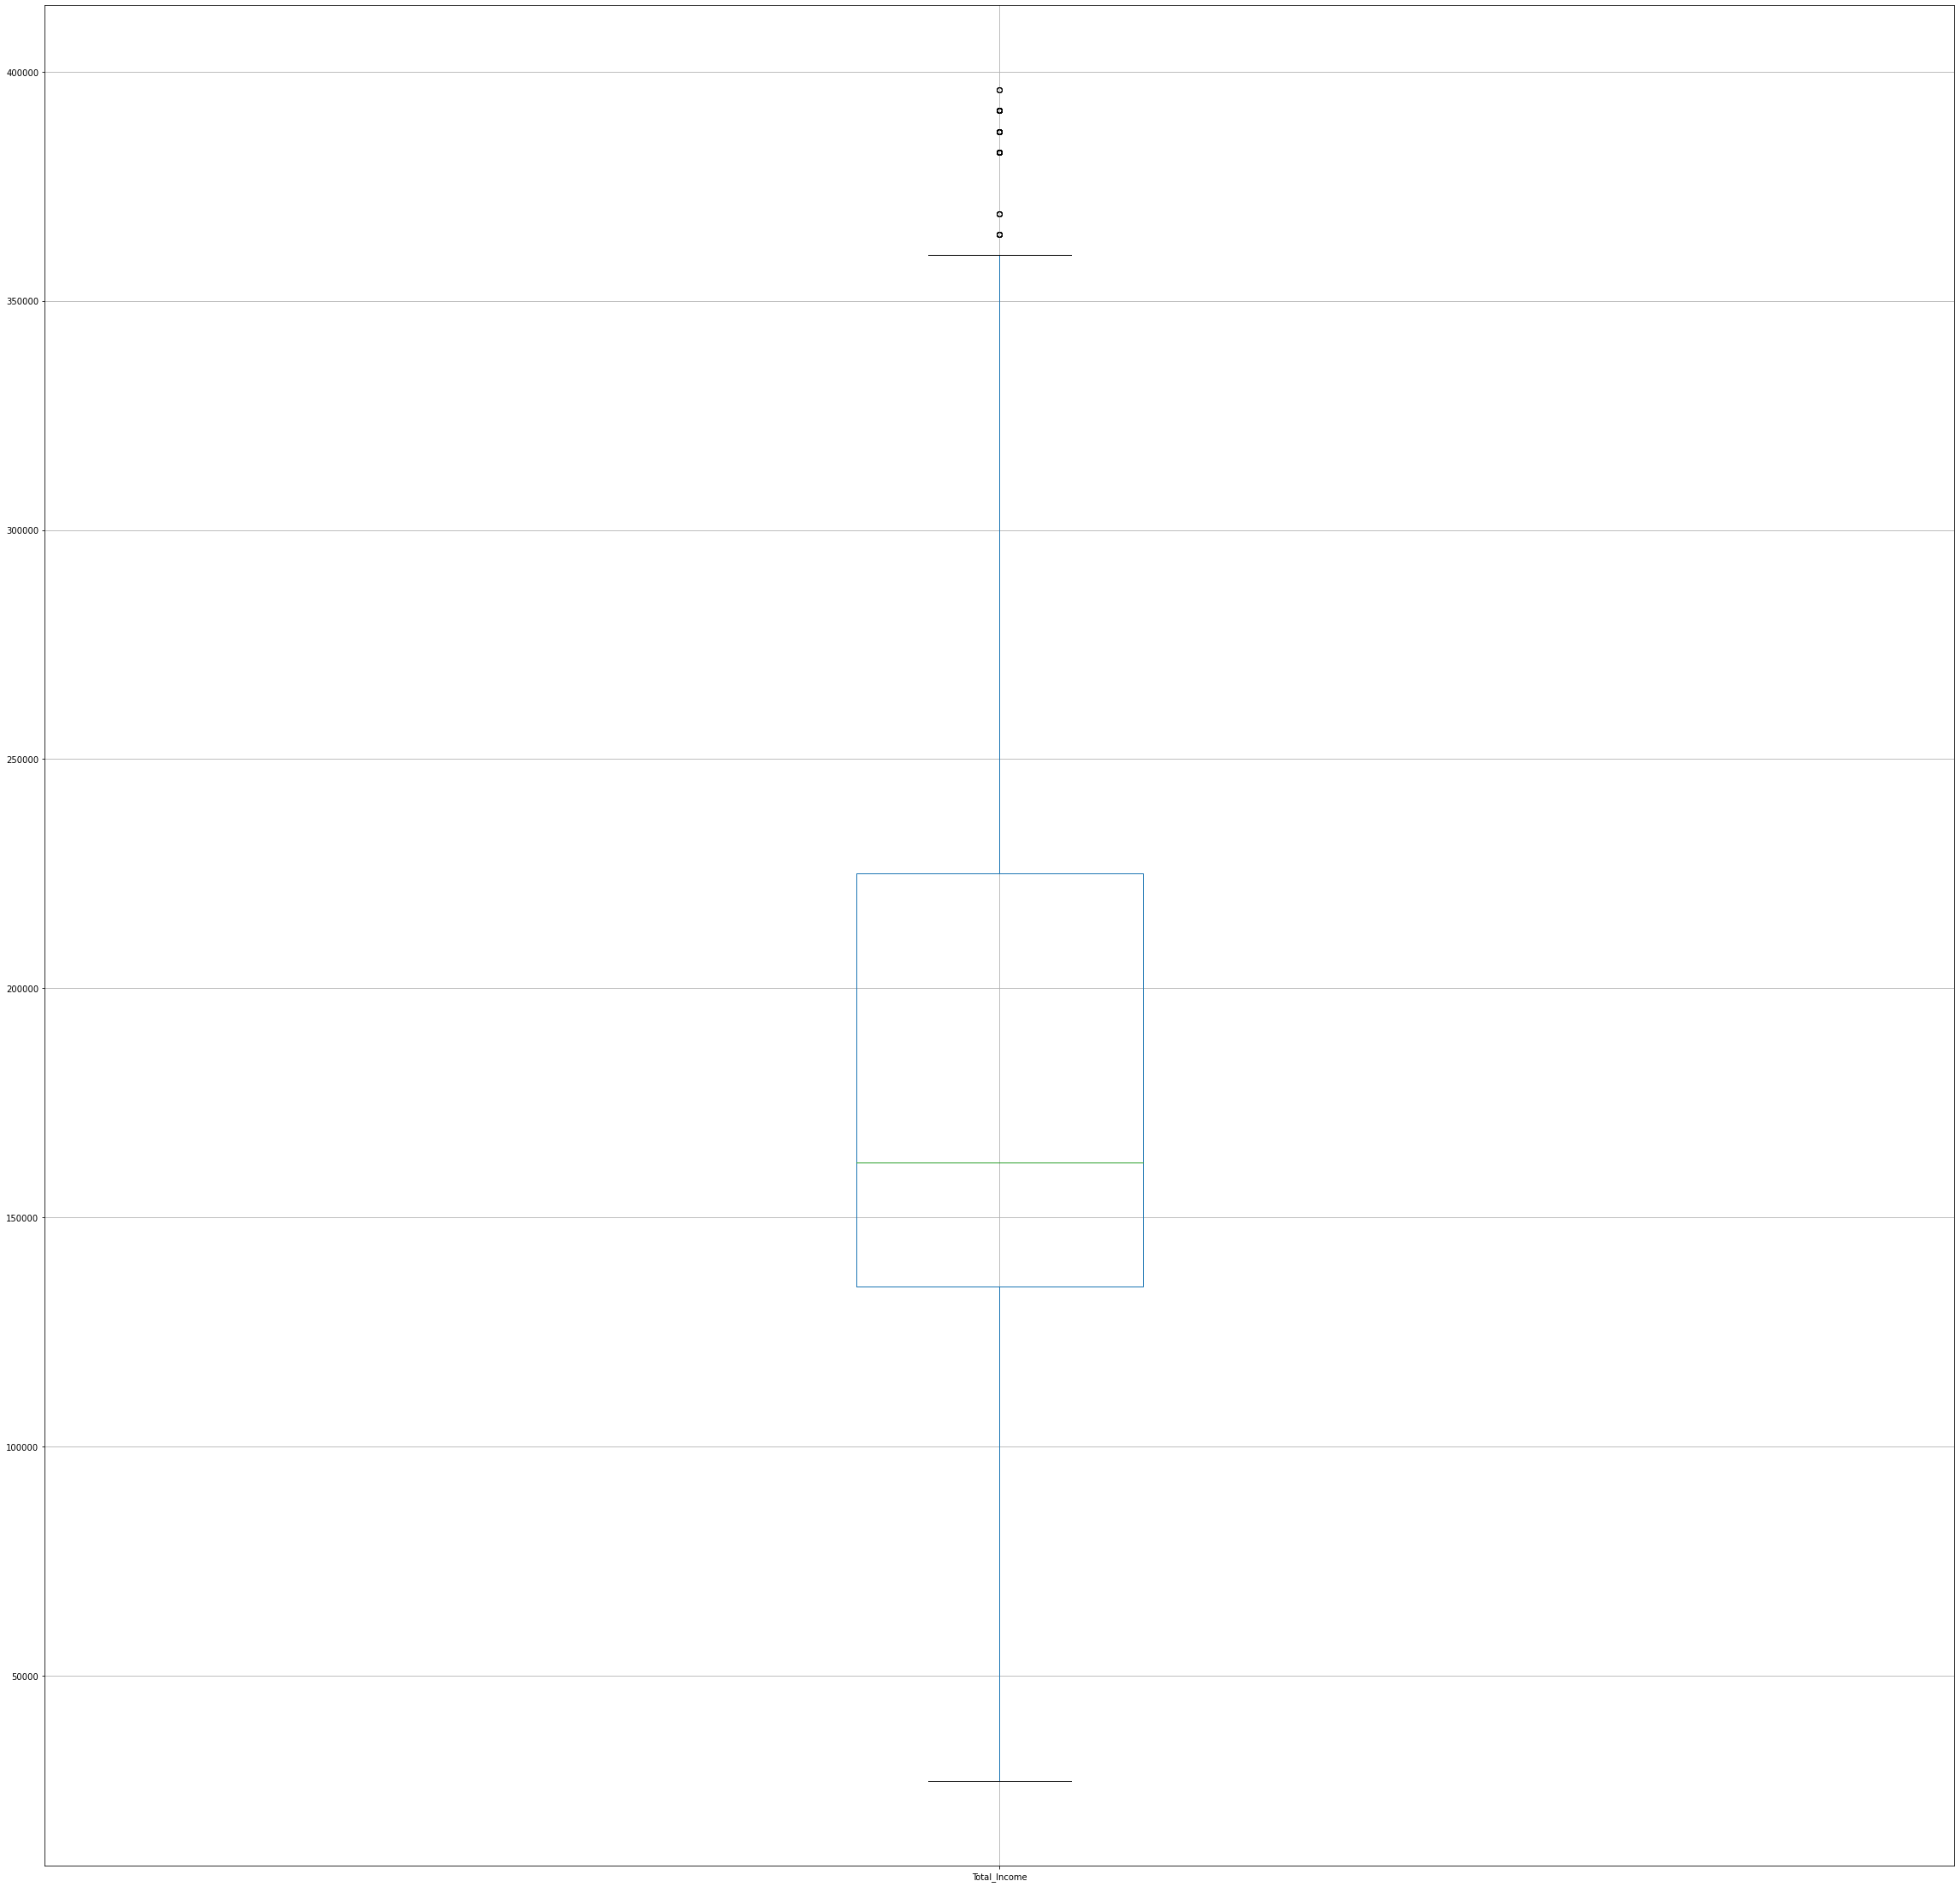

In [13]:
normalized_data_all.boxplot(column = ['Total_Income'], figsize=(40, 40))

In [14]:
# Make a copy of sel features because we are going to need to remove Total_Income before plotting
tmp_feats = sel_features.copy()

# Normalize the data by removing anything above 2 std deviations using the z-score of each respective column
normalized_data_sel = app_data[(np.abs(stats.zscore(app_data[tmp_feats])) < std_dev).all(axis=1)]

# Remove Total_Income because it ruins the graph scaling.
tmp_feats.remove('Total_Income')

<AxesSubplot:>

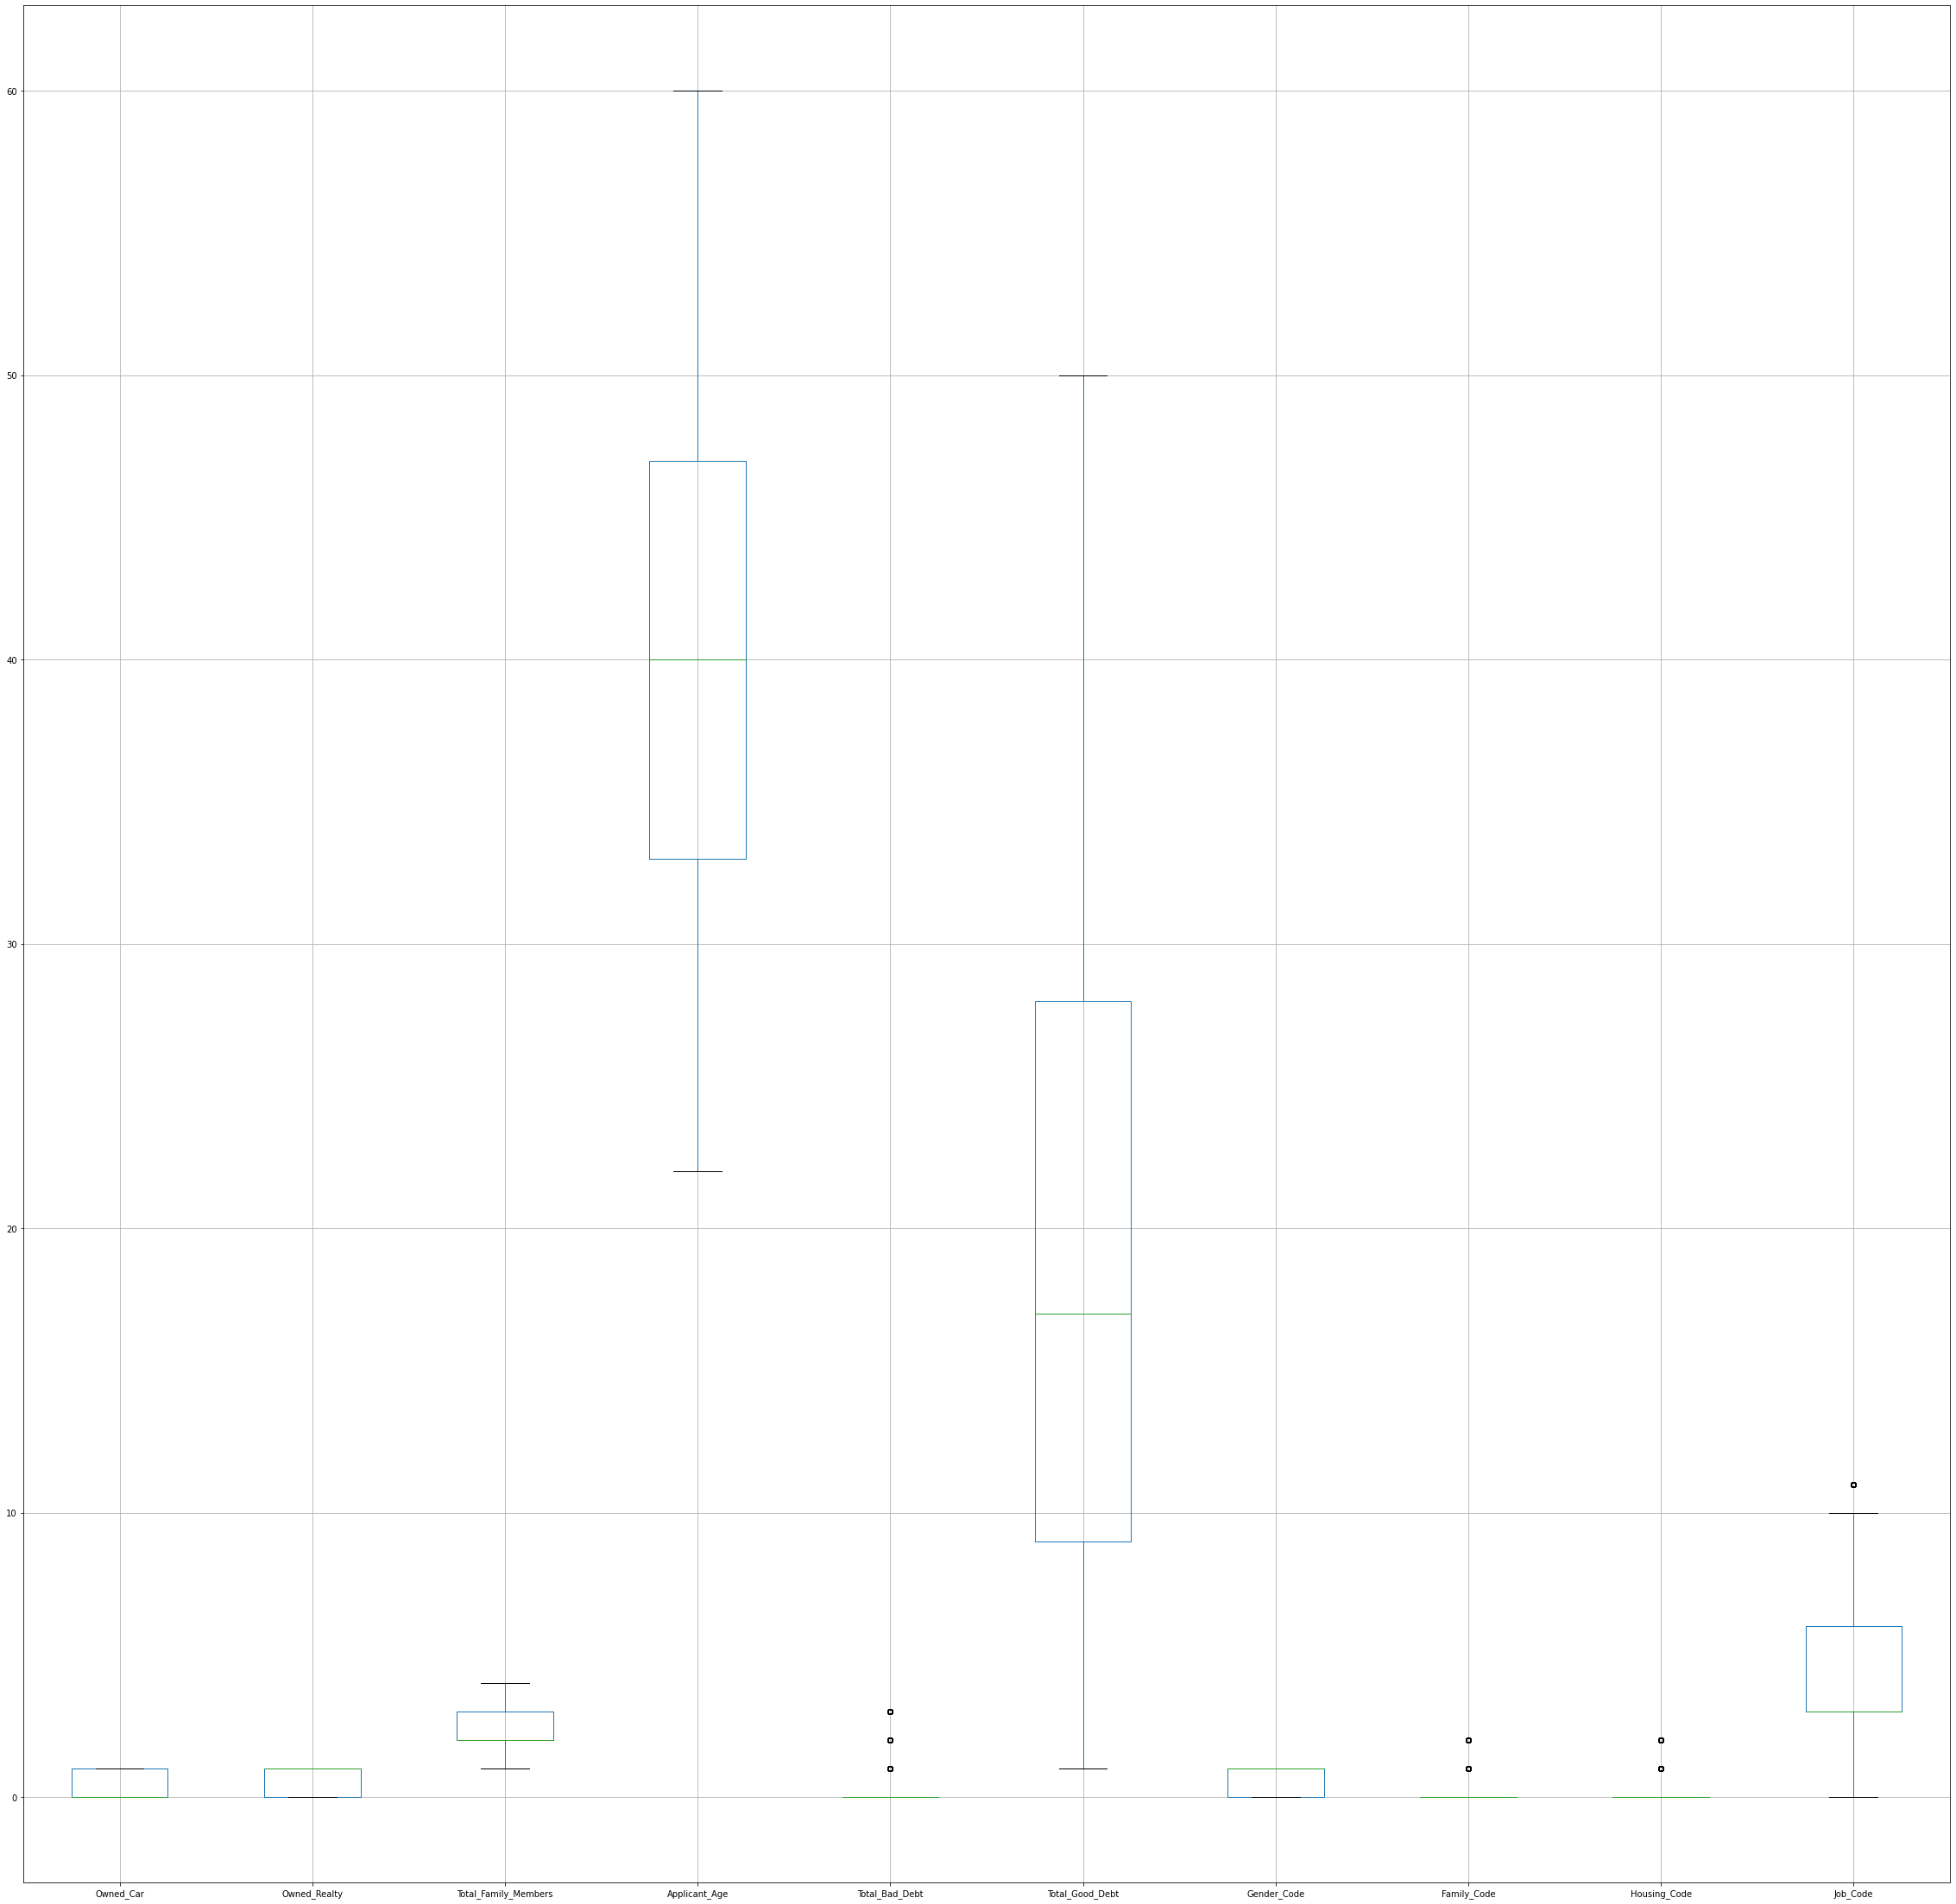

In [15]:
# Plot all selected features except Total_Income
normalized_data_sel.boxplot(column = tmp_feats, figsize=(40, 40))

<AxesSubplot:>

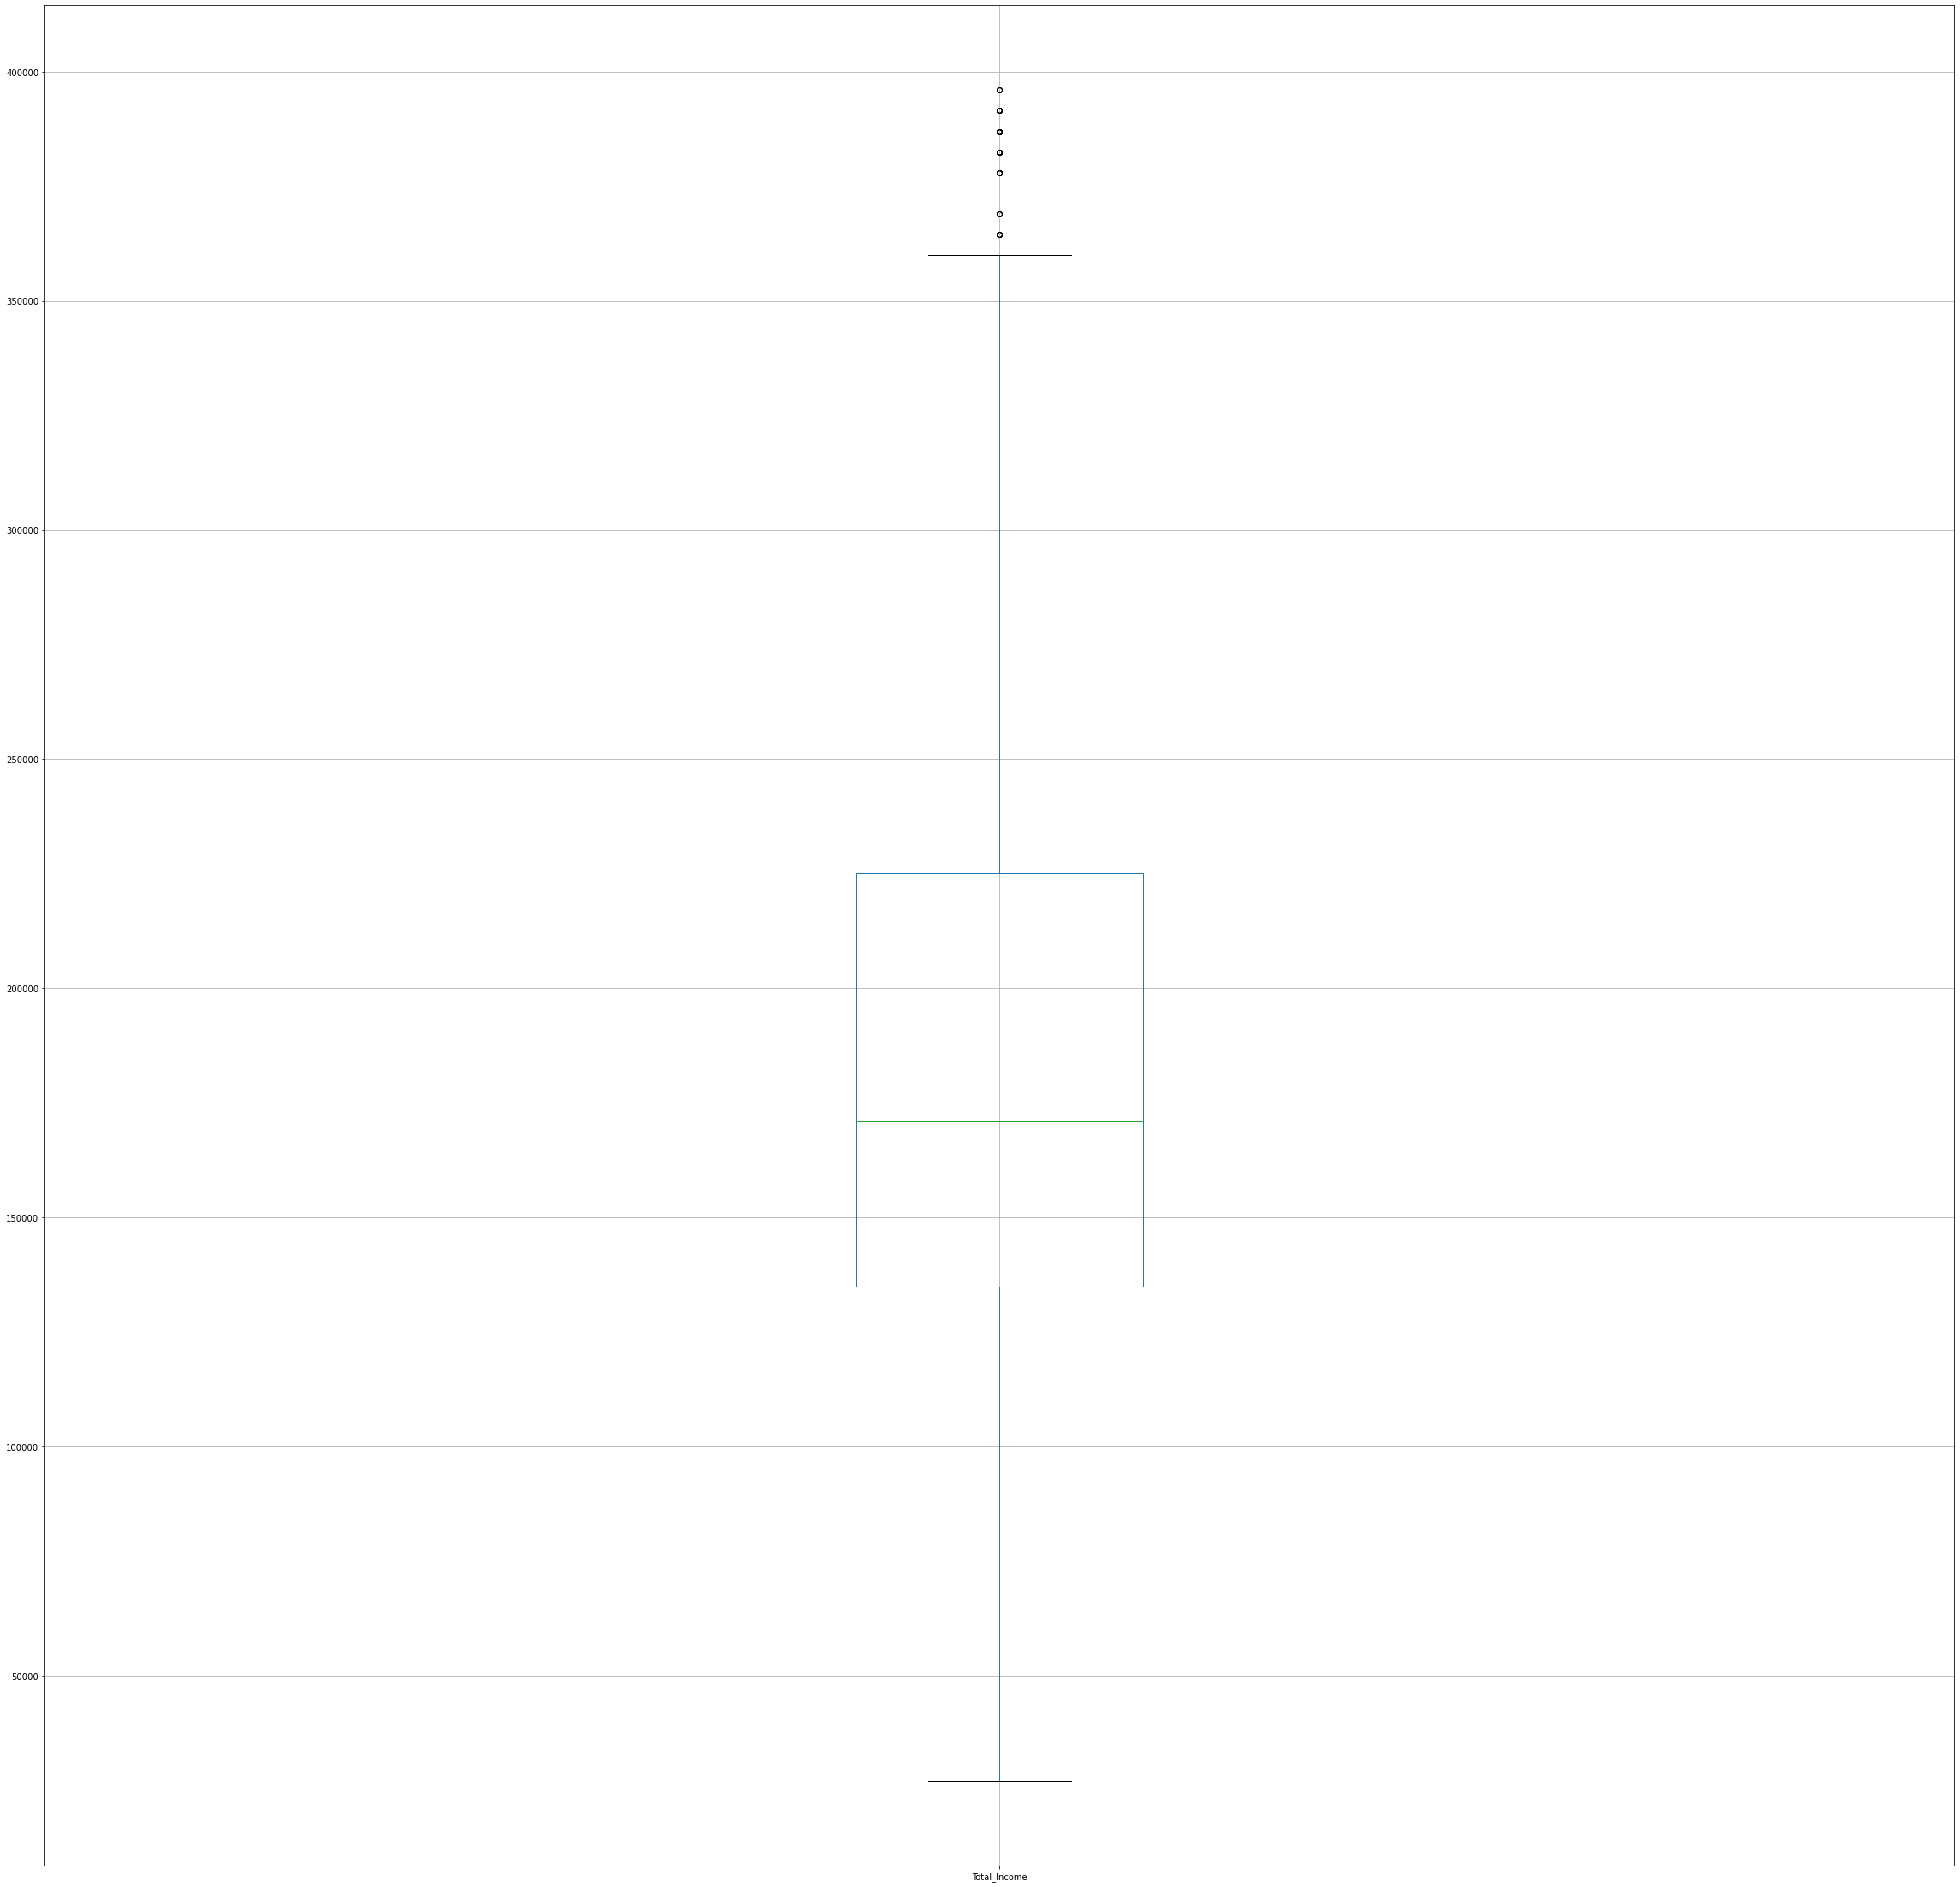

In [16]:
normalized_data_sel.boxplot(column = ['Total_Income'], figsize=(40, 40))

The following scatter matrix for all attributes will serve as an eagle eye view to see if any kind of relationship jumps out at us/

### !----------------- THE FOLLOWING CODE BLOCK TAKES A WHILE AND PRODUCES A LARGE IMAGE --------------------!
For readabilites and speesd sake, it will be commented out, please uncomment it if you would like to see it.

In [17]:
# scatter_matrix(normalized_data_all[all_features], figsize=(40, 40))
# print() # This print is only used to stop the spew from scatter_matrix

Now, let us take a look at the hand selected features.

In [18]:
# scatter_matrix(normalized_data_sel[sel_features], figsize=(40, 40))
# print() # This print is only used to stop the spew from scatter_matrix

### !--------------------------------------------------------------------------------------------------------------------------------!

Let us take a look at a couple more plots to see if which list of features may be better.

ALL FEATURES



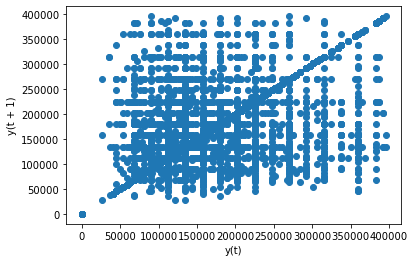

In [19]:
print('ALL FEATURES')
lag_plot(normalized_data_all[all_features])
print()

SELECTED FEATURES



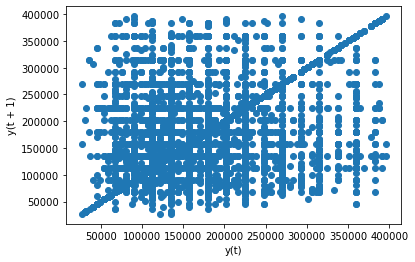

In [20]:
print('SELECTED FEATURES')
# lag_plot(normalized_data_sel[sel_features])
lag_plot(normalized_data_sel['Total_Income'])
print()

Looking at both the lag plots, it looks like out chosen selected features match. The fact that there is a discernable structure to the lag plot tells us that there is some sort of relationship that can lead us to predicting which applications will be successful and which won't.

## Extras

### Augmentation
It is possible to augment this data. We could get the data from another source and add it to ours. This would be an example of real data augemtnation. Another way to ad data would be to do what statisticaians do and use the standard deviation mean to create records within the avergae bounds of the dataset.

It may not be needed though, we did manage to see that the data had an overwhelming majority of successful applications versus unsuccessful applications. This may be a sign of bias that our dataset may be unusable. For exmaple, if the dataset comes from a high end department store, then the common demographic that frequents the store will have an advantage. 

However, if the department store itself is requesting this research, then the dataset may be invaluable. In retail, there has been a large push for credit card application because of research showing that customers with a credit card tend to frequent the store more than customers without a credit card. Using the dataset, the department store would be able to see what kind of wiggle room they have to get more customers approved for a credit card and thus, having a more steady cash flow